In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/meduk0/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Read data

In [ ]:
data = pd.read_csv('../data/twitter_training.csv')
v_data = pd.read_csv('../data/twitter_validation.csv')

In [ ]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
v_data


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# columns names
data.columns = ['id', 'game', 'sentiment', 'text']
v_data.columns = ['id', 'game', 'sentiment', 'text']

In [ ]:
data

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
v_data

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


## Data Exploration

In [ ]:
data.shape

(74681, 4)

In [ ]:
data.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [ ]:
data.describe(include='all')

,id,game,sentiment,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


### i) Making BarPlot of ID

In [ ]:
id_types = data['id'].value_counts()
id_types

id
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64

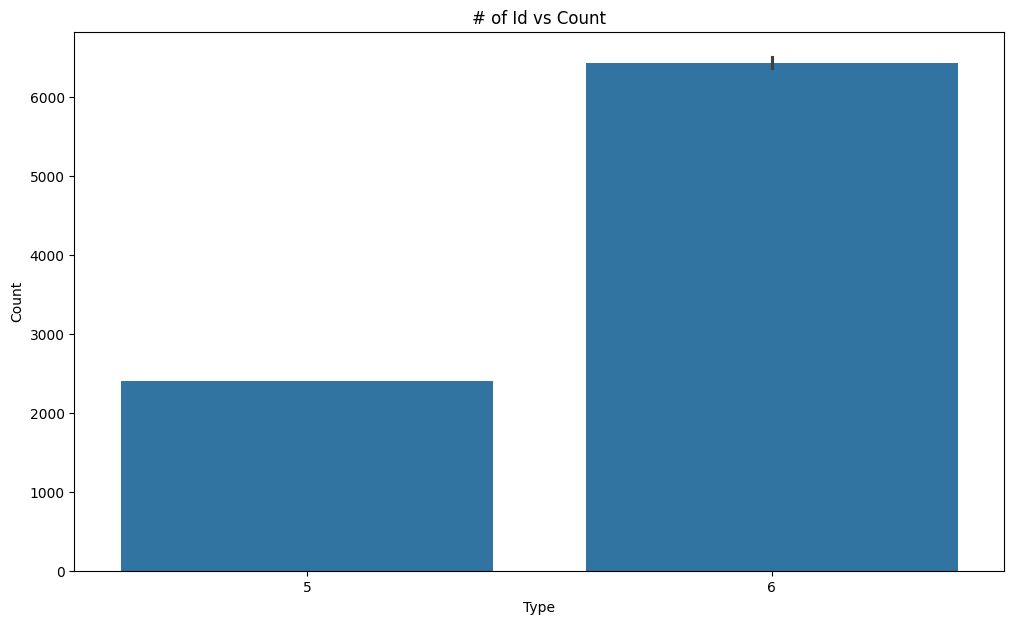

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

### ii) Making Barplot of Game

In [ ]:
game_types = data['game'].value_counts()
game_types

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

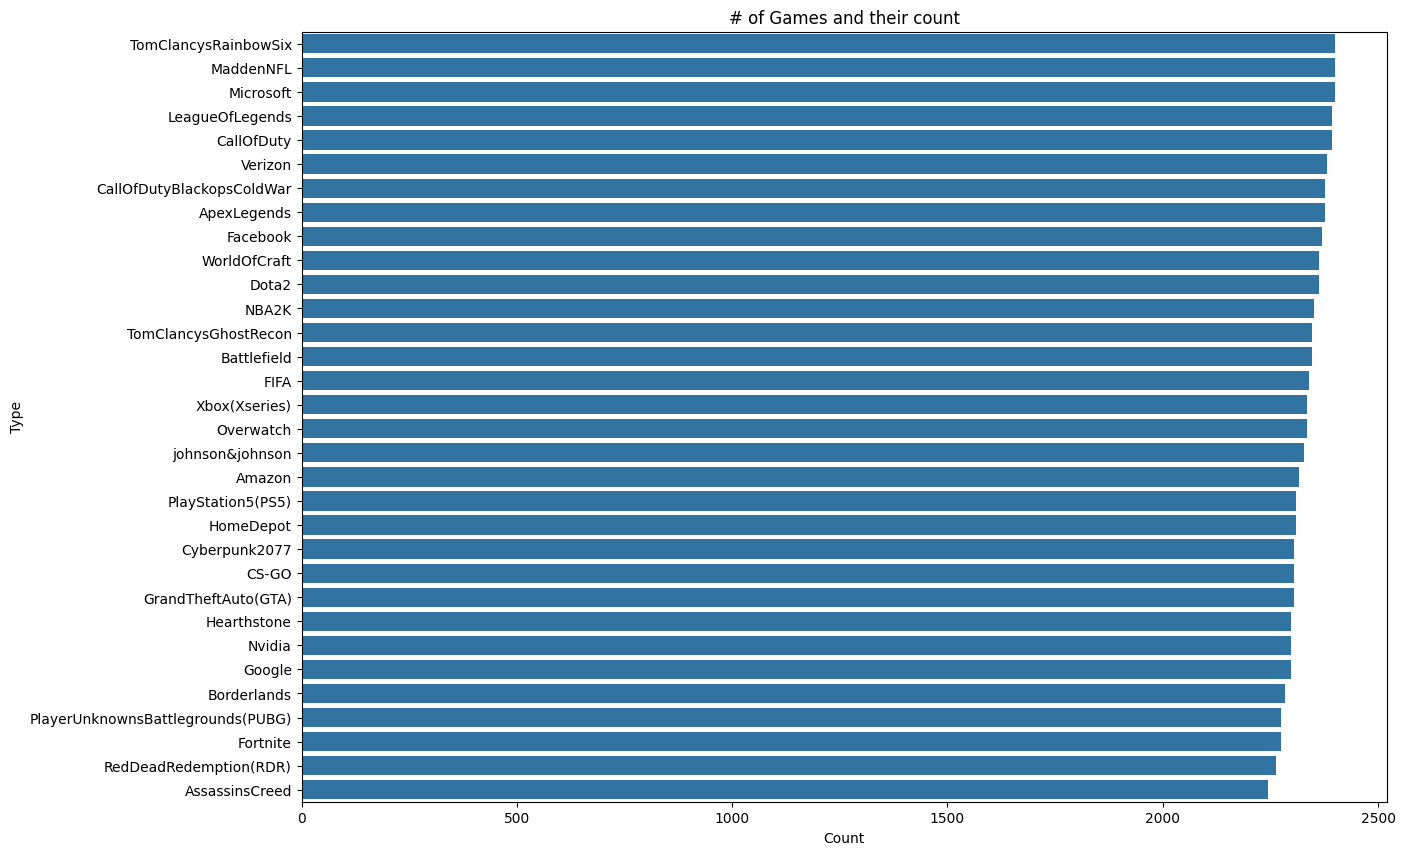

In [ ]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)  
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

### iii) Graph of Sentiments vs Game with their Count

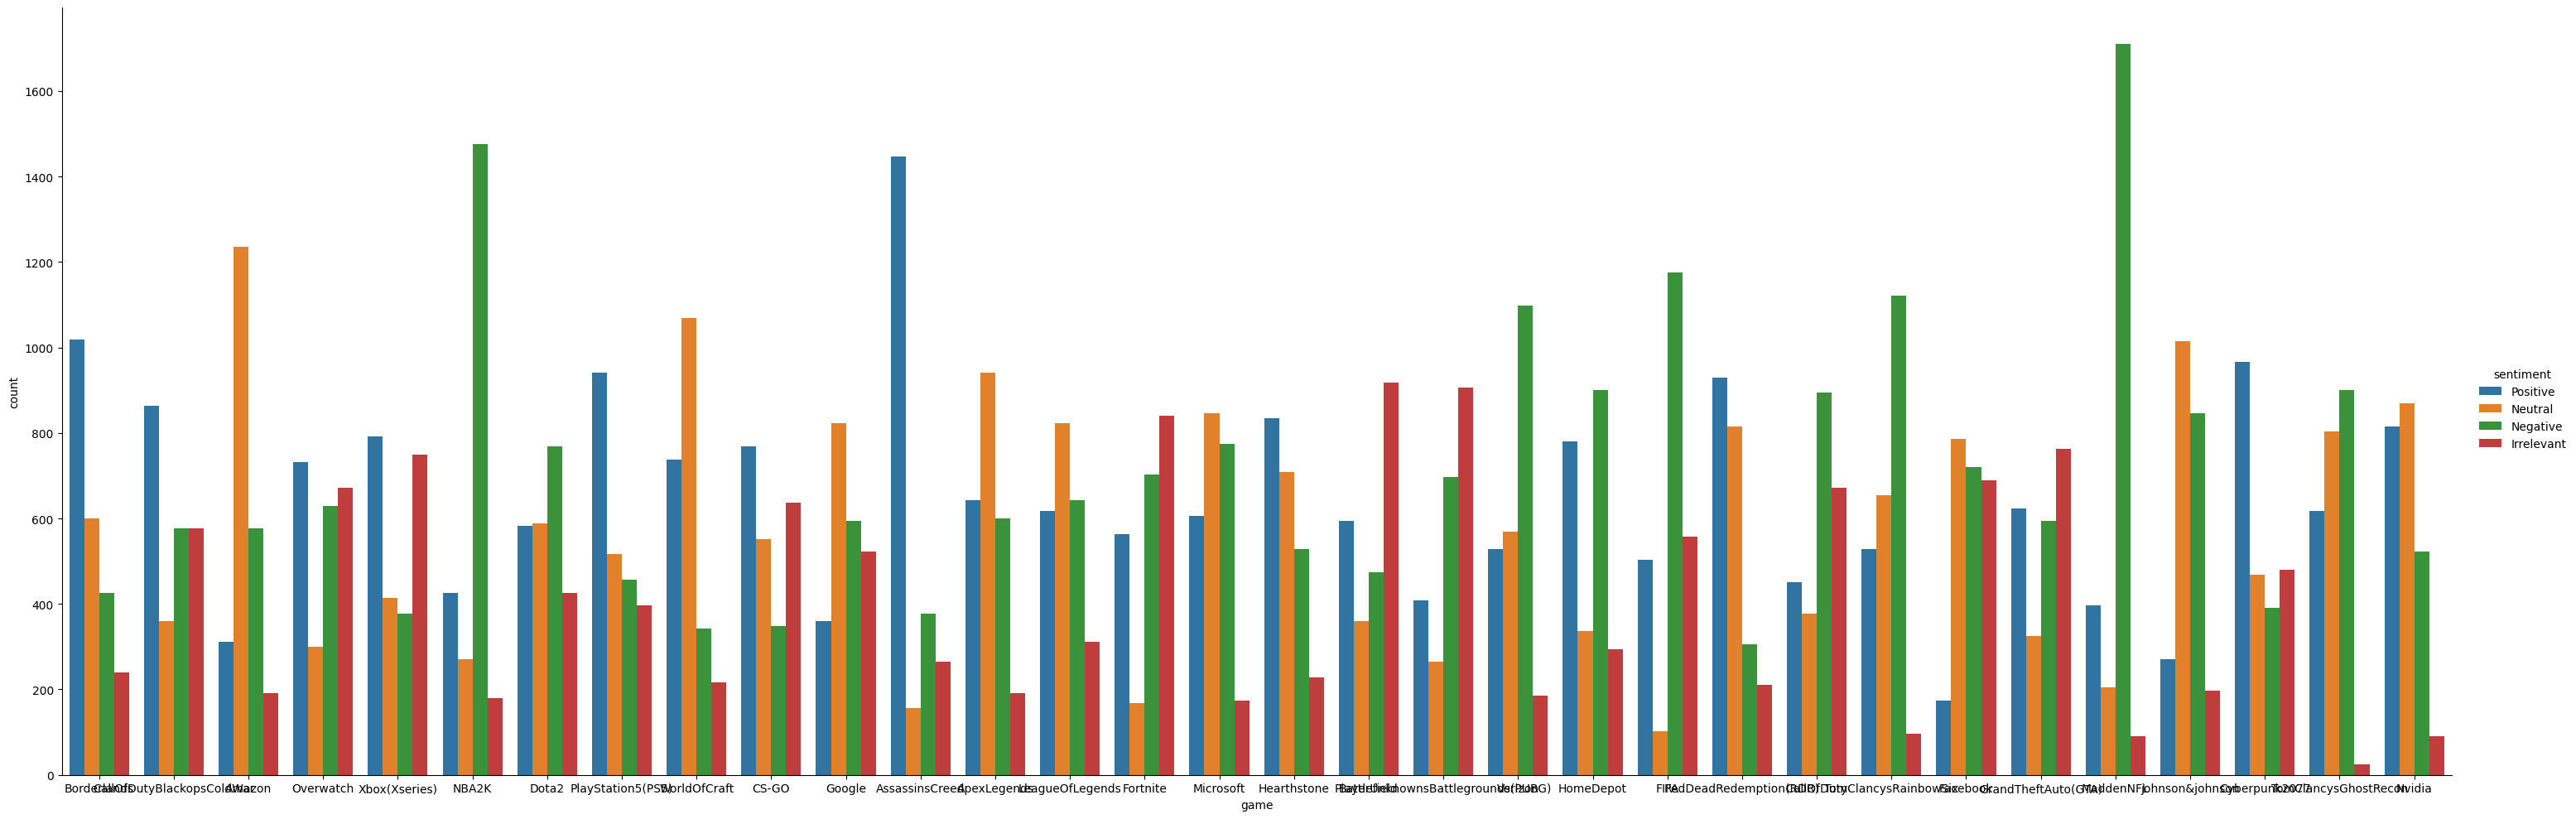

In [ ]:
sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=data)

## Data Pre-processing

<Axes: >

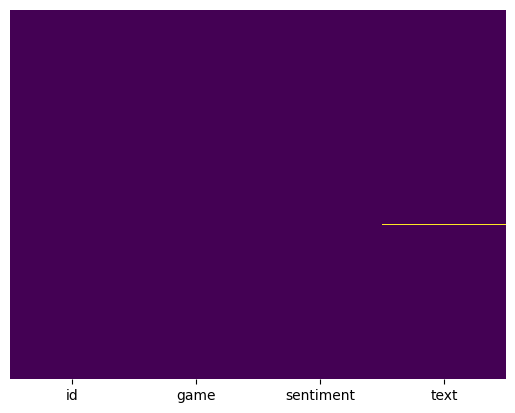

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  74681


,Total Missing,In Percent
text,686,0.92
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [ ]:
data.dropna(subset=['text'],inplace=True)

In [ ]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  73995


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [ ]:
sentiment_types = data['sentiment'].value_counts()

plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

No null values present now

## Data Reduction

In [ ]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [ ]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

- Reducing the data with equal ratio with their Sentiments, so that sentiments Distribution will be same for model prediction

In [ ]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [ ]:
train0.shape, train1.shape, train2.shape, train3.shape

((1863, 4), (1721, 4), (1072, 4), (1509, 4))

In [ ]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


## Data Cleaning

In [ ]:
my_stopwords = set(["http", "'s", "n't", "'m", "'re", "'ve"])



import re
from nltk.corpus import stopwords

# Create a stopwords set adding some personal 'words'
stopwords_english = set(stopwords.words('english'))
my_stopwords = set(["http", "'s", "n't", "'m", "'re", "'ve"])
stopwords_english.update(my_stopwords)

def preprocess_review(text):
    # Convert to lower case
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Split text into tokens
    tokens = text.split()

    # Filter tokens
    clean_tokens = [tok for tok in tokens if tok not in stopwords_english and len(tok) > 1]

    # Join tokens into a string
    clean_text = ' '.join(clean_tokens)

    return clean_text



In [ ]:
data['clean_text'] = data['text'].apply(preprocess_review)

Now we can remove the original text column

In [ ]:
data = data.drop(columns=['text'])

data.head()

,id,game,sentiment,clean_text
23,2405,Borderlands,Negative,biggest dissappoinment life came year ago fuck...
24,2405,Borderlands,Negative,biggest disappointment life came year ago
25,2405,Borderlands,Negative,biggest disappointment life came year ago
26,2405,Borderlands,Negative,biggest dissappoinment life coming year ago fu...
27,2405,Borderlands,Negative,biggest male dissappoinment life came hanging ...


In [ ]:
# Remove unceccessary columns
v_data = v_data.drop(['id'],axis=1)

# Preprocess training data adding new column
v_data['clean_text'] = v_data['text'].apply(preprocess_review)

# Remove original text column
v_data = v_data.drop(columns=['text'])

v_data.head()

,game,sentiment,clean_text
0,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
1,Microsoft,Negative,microsoft pay word functions poorly samsungus ...
2,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...
3,Google,Neutral,president slapping americans face really commi...
4,FIFA,Negative,hi eahelp ive madeleine mccann cellar past yea...


## Performing Exploratory Data Analysis for final dataset

In [ ]:
id_types = data['id'].value_counts()
id_types

id
2405    6
1810    6
1748    6
1754    6
1760    6
       ..
1602    3
1880    3
333     3
9388    2
9267    2
Name: count, Length: 1040, dtype: int64

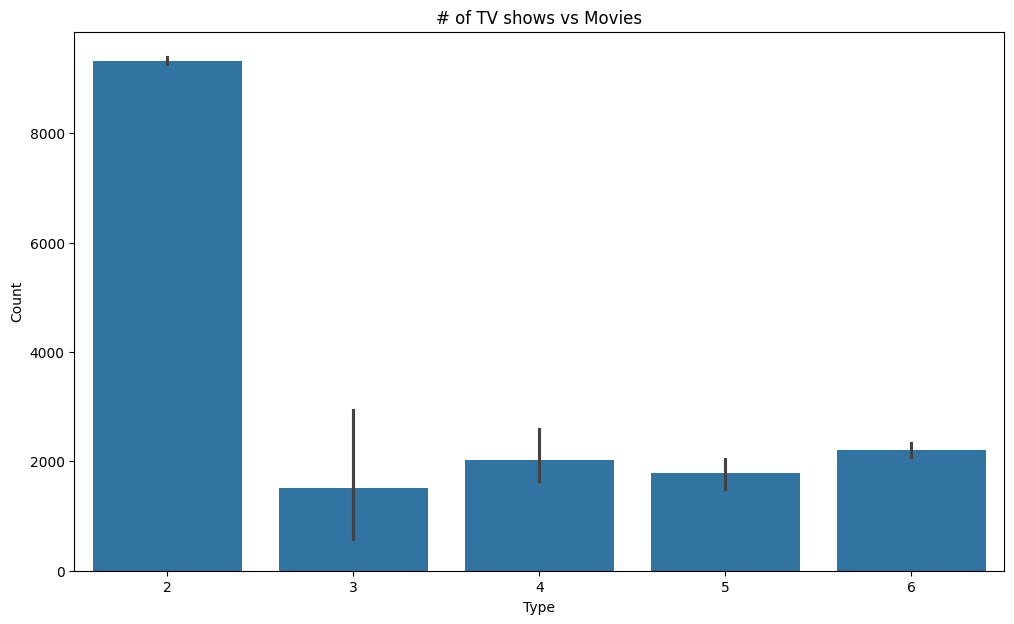

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [ ]:
game_types = data['game'].value_counts()
game_types

game
Borderlands                  2279
CallOfDutyBlackopsColdWar    2192
Amazon                       1321
Overwatch                     373
Name: count, dtype: int64

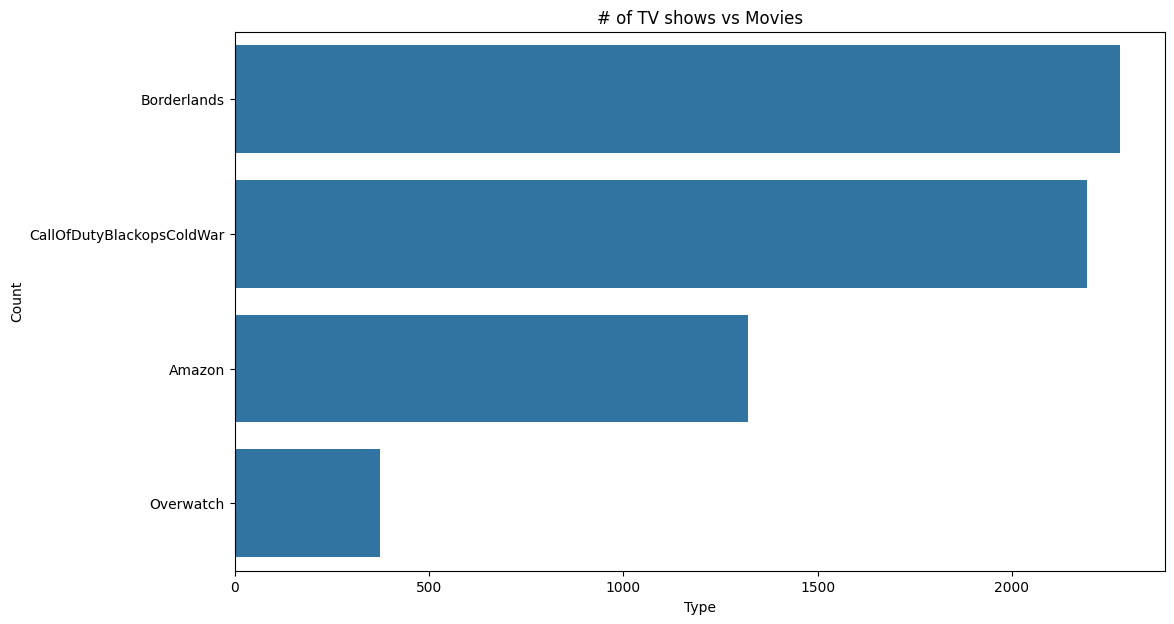

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [ ]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types

sentiment
Negative      1863
Positive      1721
Neutral       1509
Irrelevant    1072
Name: count, dtype: int64

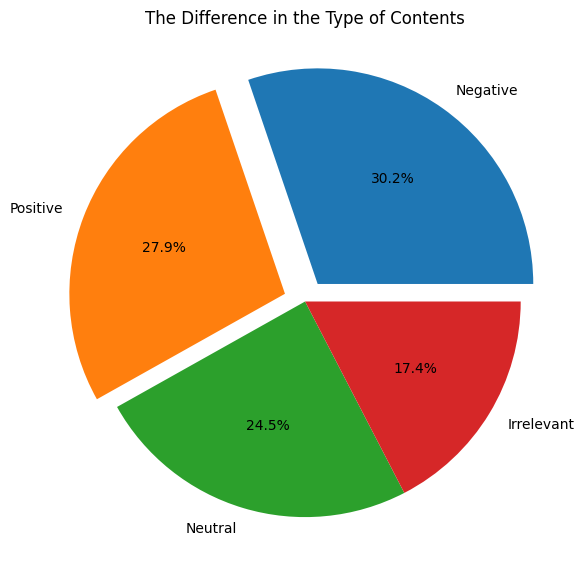

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

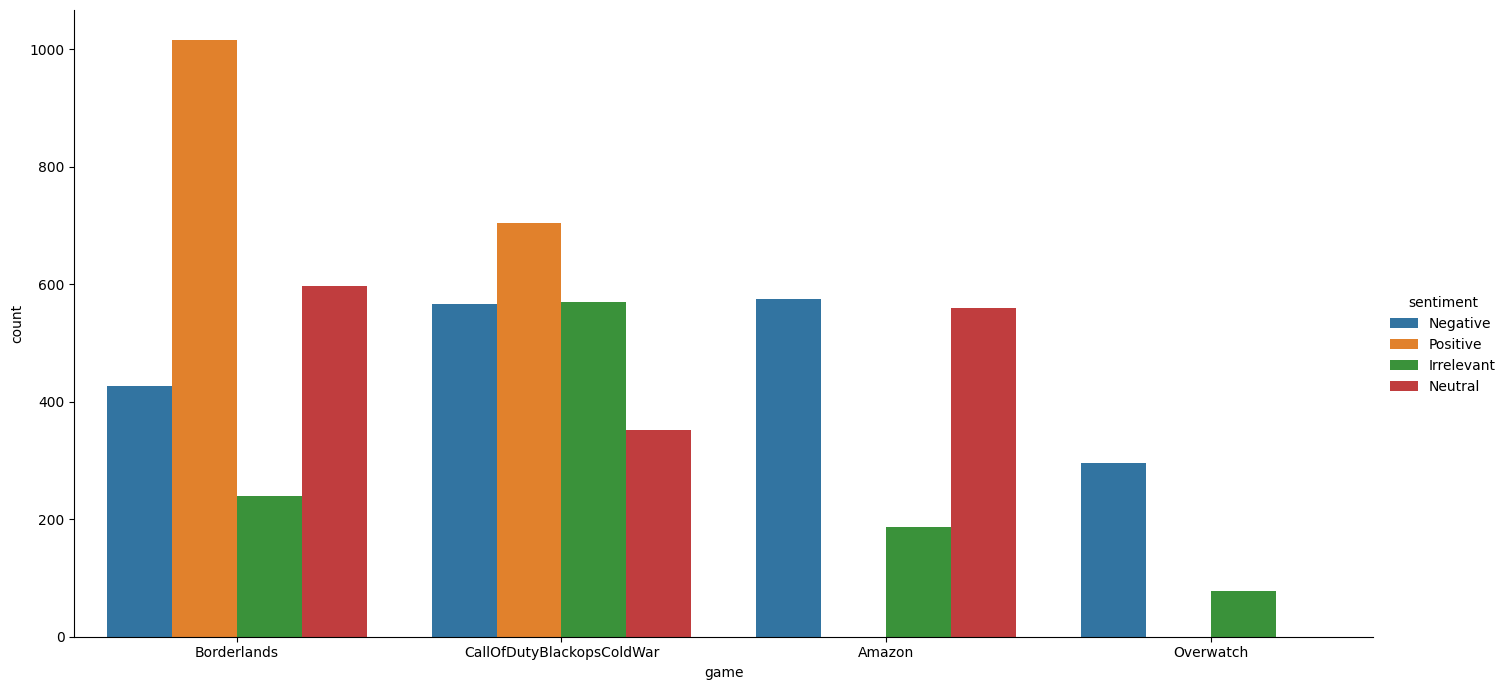

In [ ]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data)

We can conclude from this graph that Borderlands is very popular and has a lot of positive reviews whereas Call of duty has a lot of mixed reviews where all sentiments are almost the same.

Amazon and Overwatch both have a lot of negative reviews without any positive reviews.

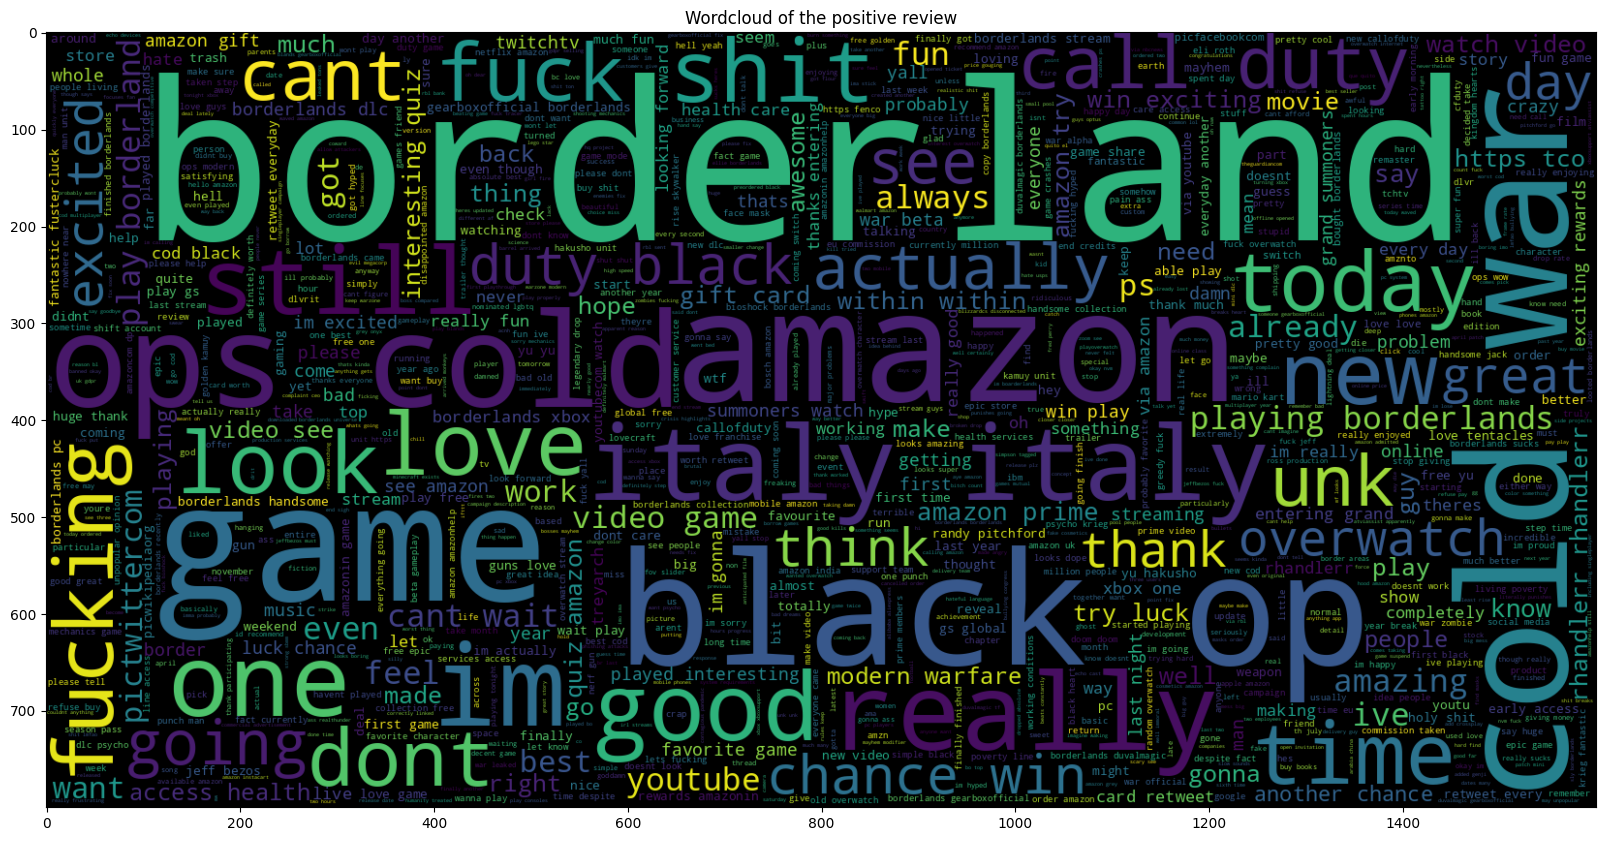

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words=1000 , width=1600 , height=800).generate(" ".join(data["clean_text"]))
plt.title("Wordcloud of the positive review")
plt.imshow(wc, interpolation = 'bilinear')

## Changing Game and Sentiments to values for making models

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
v_data['sentiment']=label_encoder.fit_transform(v_data['sentiment'])
v_data['game']=label_encoder.fit_transform(v_data['game'])

In [ ]:
data = data.drop(['id'],axis=1)

In [ ]:
data

,game,sentiment,clean_text
23,1,1,biggest dissappoinment life came year ago fuck...
24,1,1,biggest disappointment life came year ago
25,1,1,biggest disappointment life came year ago
26,1,1,biggest dissappoinment life coming year ago fu...
27,1,1,biggest male dissappoinment life came hanging ...
...,...,...,...
5603,0,2,amazing read aloud book child select amazon wi...
5604,0,2,amazing reading book child select wish fitzpat...
5605,0,2,amazing book read aloud child choose amazon wi...
5606,0,2,amazing read aloud book child select amazon wi...


In [ ]:
v_data

,game,sentiment,clean_text
0,0,2,bbc news amazon boss jeff bezos rejects claims...
1,19,1,microsoft pay word functions poorly samsungus ...
2,5,1,csgo matchmaking full closet hacking truly awf...
3,13,2,president slapping americans face really commi...
4,10,1,hi eahelp ive madeleine mccann cellar past yea...
...,...,...,...
994,14,0,toronto arts culture capital canada wonder wan...
995,5,0,actually good move tot bring viewers one peopl...
996,4,3,today sucked time drink wine play borderlands ...
997,19,3,bought fraction microsoft today small wins


In [ ]:
data.nunique()

game             4
sentiment        4
clean_text    5158
dtype: int64

In [ ]:
v_data.nunique()

game           32
sentiment       4
clean_text    995
dtype: int64

## Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = data['clean_text']
y = data['sentiment']

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
lr_acc = accuracy_score(y_test, predictions.round())

In [ ]:
print('Training data accuracy : ',lr_acc)

Training data accuracy :  0.8929440389294404


## Classification Report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[172  17   6  18]
 [  4 383   5  10]
 [  0  15 254  21]
 [  6  26   4 292]]


              precision    recall  f1-score   support

           0       0.95      0.81      0.87       213
           1       0.87      0.95      0.91       402
           2       0.94      0.88      0.91       290
           3       0.86      0.89      0.87       328

    accuracy                           0.89      1233
   macro avg       0.90      0.88      0.89      1233
weighted avg       0.90      0.89      0.89      1233



## Conclusion

The model created using Logistic Regression has an accuracy of 90%. The high accuracy of my model suggests that it can be used in real-world applications for analyzing sentiment on Twitter. The accuracy can be further improved with hyperparameter tuning.